In [1]:
import pandas as pd
import os
from pandas import concat
from matplotlib import pyplot
import numpy as np
from pandas.plotting import autocorrelation_plot 

In [2]:
print("Local path is:", os.getcwd())

series = pd.read_csv('datasets/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True).squeeze()

Local path is: C:\Users\lucat\GitHub\TIME_SERIES


# Checks for Stationarity
There are many methods to check whether a time series (direct observations, residuals, otherwise)
is stationary or non-stationary.

 **Look at Plots**: You can review a time series plot of your data and visually check if there
are any obvious trends or seasonality.

 **Summary Statistics**: You can review the summary statistics for your data for seasons
or random partitions and check for obvious or significant differences.

 **Statistical Tests**: You can use statistical tests to check if the expectations of stationarity
are met or have been violated.

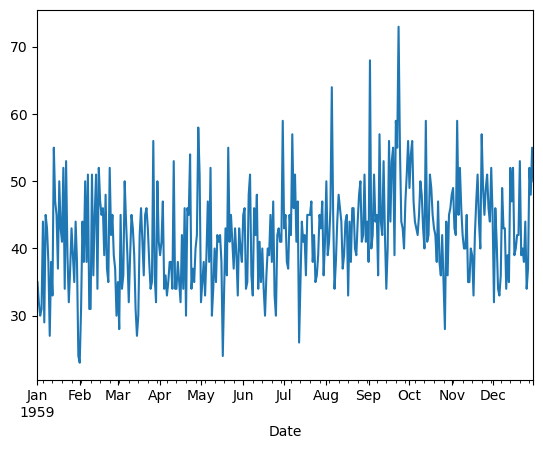

In [3]:
series.plot();

# Summary Statistics
A *quick and dirty* check to see if your time series is non-stationary is to review summary
statistics. 

**You can split your time series into two (or more) partitions and compare the mean
and variance of each group. **

If they differ and the difference is statistically significant, the time
series is likely non-stationary. 

Next, let's try this approach on the Daily Births dataset.

## Histogram
Because we are looking at the mean and variance, we are assuming that the data conforms to a
Gaussian (also called the bell curve or normal) distribution. 

We can also quickly check this by eyeballing a histogram of our observations.

Running the example plots a histogram of values from the time series. 

We clearly see the **bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail**.


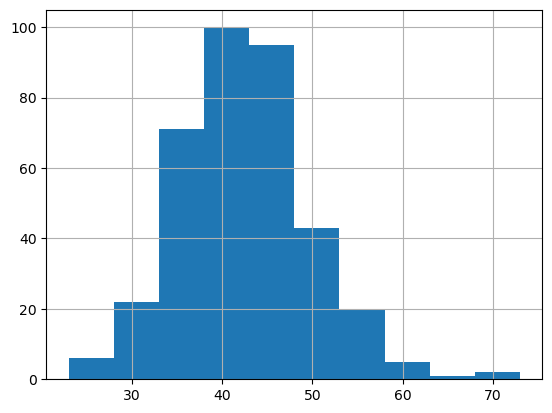

In [4]:
series.hist()
pyplot.show()

# Split the time series into two contiguous sequences
Next, we can split the time series into two contiguous sequences. We can then calculate the
mean and variance of each group of numbers and compare the values.


In [5]:
X = series.values

split = int(len(X) / 2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()

var1, var2 = X1.var(), X2.var()

# Compare the sequences
Running this example shows that the mean and variance values are different, but in the
same ball-park.

In [6]:
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


# Airline Passengers Dataset
Cutting straight to the chase, we can split our dataset and calculate the mean and variance for
each group.


<Axes: xlabel='Month'>

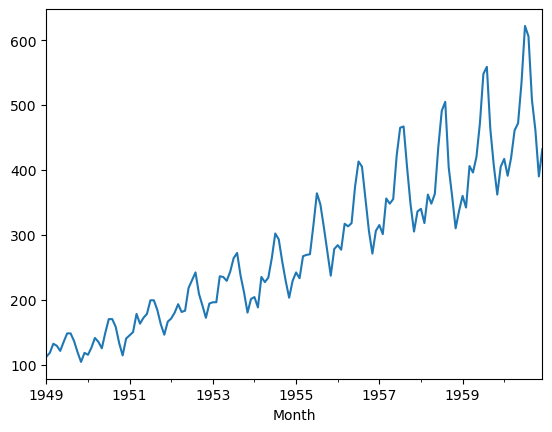

In [7]:
# calculate statistics of partitioned time series data
series = pd.read_csv('datasets/airline-passengers.csv', header=0, index_col=0, parse_dates=True).squeeze()
series.plot()


In [8]:
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

# Check the sequences
Running the example, we can see the mean and variance look very dfferent. We have a
non-stationary time series.

In [9]:
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 182.902778, mean2 = 377.694444
variance1 = 2244.087770, variance2 = 7367.962191


# Check out for Gaussian distribution
Running the example shows that indeed the distribution of values does not look like a
Gaussian, therefore the mean and variance values are less meaningful. 

**This squashed distribution of the observations may be another indicator of a non-stationary time series.**

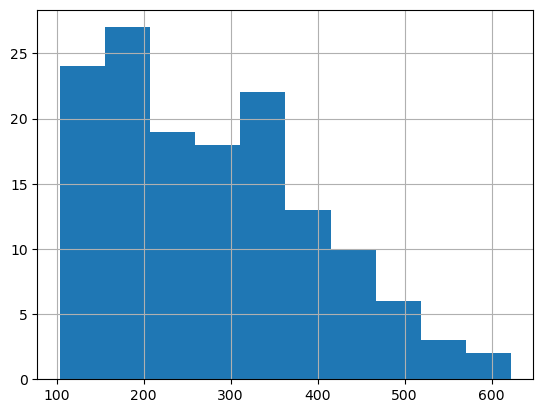

In [10]:
series.hist()
pyplot.show()

# Log transformation
Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing. 

**This may suggest an exponential growth from season to season. A log transform can be used to atten out exponential change back to a linear relationship**

Below is the same histogram with a log transform of the time series.

Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution
of values.

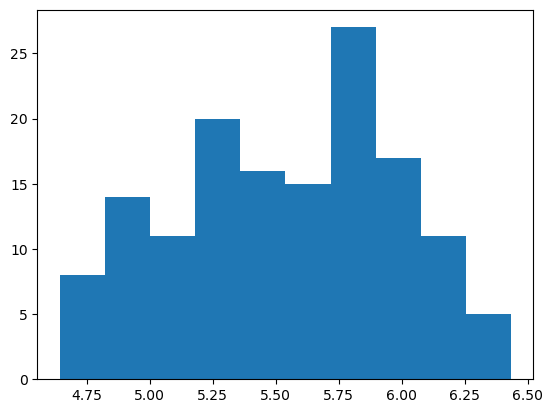

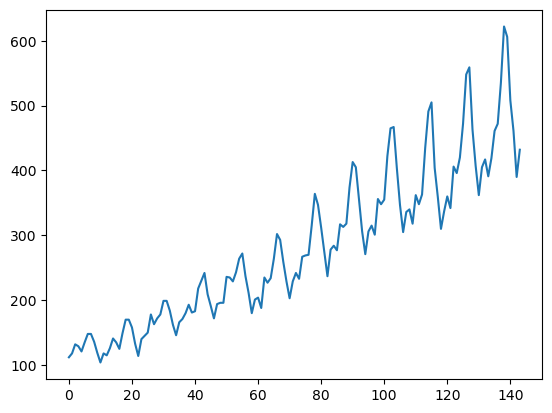

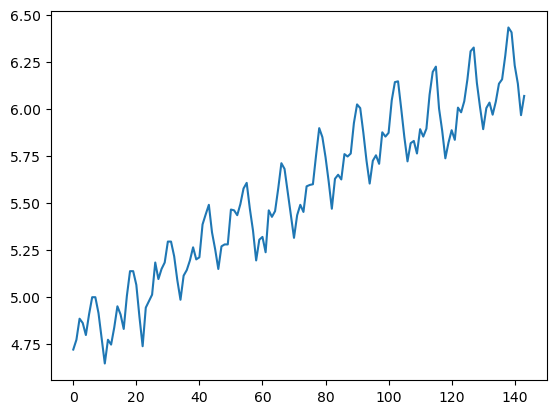

In [11]:
X = series.values
X_log = np.log(X)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

# Calculate the mean and standard deviation of the values of the log transformed dataset.


In [12]:
# calculate statistics of partitioned log transformed time series data

X = series.values
X = np.log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

# Compare the statistical indices
Running the examples shows mean and standard deviation values for each group that are
again similar, but not identical. 

**Perhaps, from these numbers alone, we would say the time
series is stationary, but we strongly believe this to not be the case from reviewing the line plot.**

In [13]:
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1 = 0.068375, variance2 = 0.049264


# Autocorrelation
Clearly, the TS cannot be stationary because of strong autocorrelation

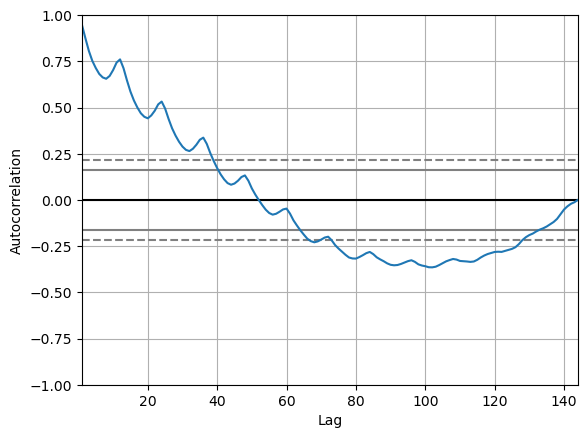

In [14]:
autocorrelation_plot(series)
pyplot.show()